# Dihydrofolate reductase (DHFR) ligands for pharmacophore identification

We explore DHFR ligands that will be used to create ligand-based pharmacophore models

In [1]:
import openpharmacophore as oph

import pandas as pd
import nglview as nv
from rdkit import Chem
from rdkit.Chem import Draw

import os
from pprint import pprint
from IPython.display import SVG

## Load  and visualize ligands

We load the ligands from their respective smiles and draw their molecular structures

In [2]:
lig_df = pd.read_csv("ligands.csv")
lig_df

,Smiles,PDBID,LigID
0,c1ccc(c(c1)C(=O)NCCC[C@@H](C(=O)O)NC(=O)c2ccc(...,1OHK,COP
1,c1cc(ccc1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCc2cnc3...,1DRF,FOL
2,c1cc(ccc1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCc2cc3c...,2DHF,DZF
3,C[N@](Cc1coc2c1c(nc(n2)N)N)c3ccc(cc3)C(=O)N[C@...,1HFP,MOT
4,C[N@](Cc1cc(ccc1OC)OC)c2cc3c(nc(nc3nc2)N)N,1BOZ,PRD
5,Cc1c(cnc2c1c(nc(n2)N)N)Cc3cc(ccc3OC)OC,1DLR,MXA


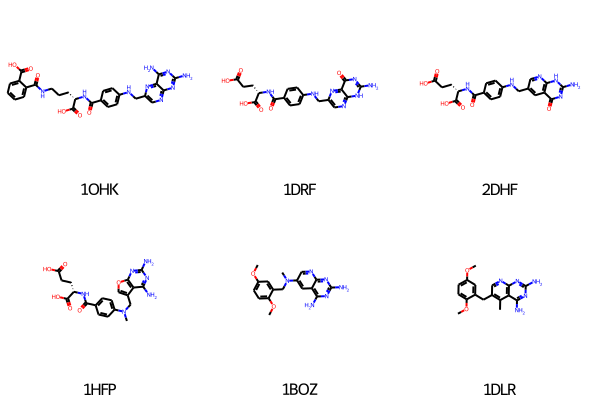

In [3]:
ligands = [Chem.MolFromSmiles(smi) for smi in lig_df["Smiles"]]
legends = [l for l in lig_df["PDBID"]]
Draw.MolsToGridImage(ligands, legends=legends, molsPerRow=3)

## Preparing the ligands

We'll generate different conformers for each of the ligands and add hydrogens to them
as well.

In [4]:
# Add hydrogens
pharmacophore = oph.LigandBasedPharmacophore()
pharmacophore.ligands = ligands
pharmacophore.add_hydrogens(ligands="all")

In [5]:
pharmacophore.generate_conformers(n_confs=-1, ligands="all")
print([l.GetNumConformers() for l in pharmacophore.ligands])

[298, 140, 160, 177, 58, 16]


## View 3D structures

In [6]:
lig_ind = 2
conf_ind = 2
nv.show_rdkit(pharmacophore.ligands[lig_ind], conf_ind=conf_ind)

NGLWidget()

## Chemical features

We find chemical features in the ligands and visualize them.

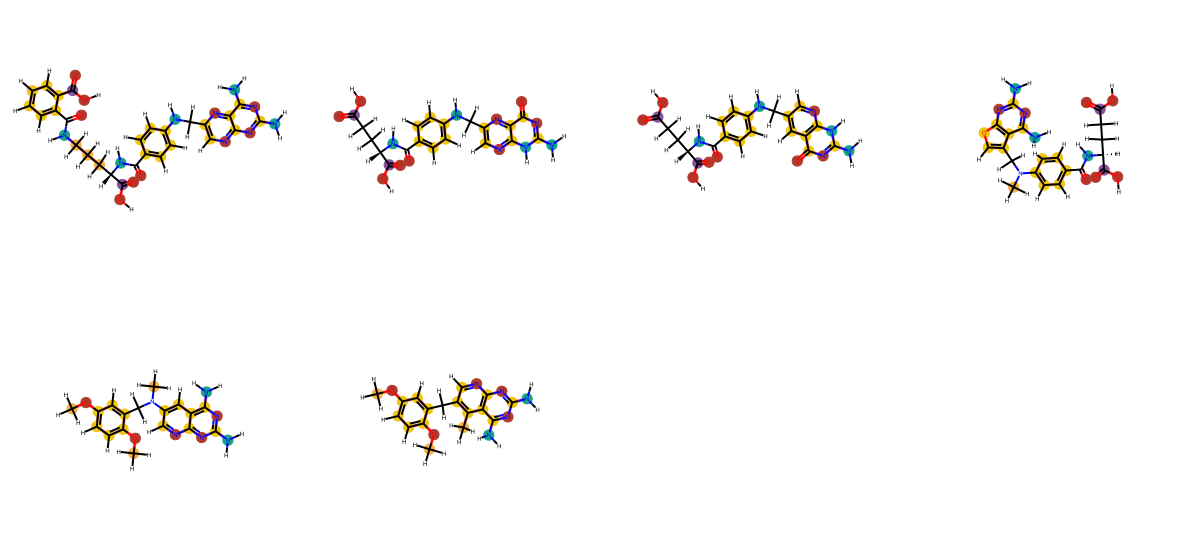

In [7]:
pharmacophore.find_chem_feats()
drawing = pharmacophore.draw((300, 280))
SVG(drawing.GetDrawingText())

## Extracting common pharmacophores

We extract common pharmacophores via recursive distance partitioning algorithm

### Finding 5-Point Pharmacophores

In [10]:
min_actives = len(pharmacophore.ligands) - 1
n_points = 5

In [11]:
pharmacophore.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)
print(f"Found {len(pharmacophore)} common pharmacophores")

Found 6 common pharmacophores


In [12]:
pharmacophore.show(0)

NGLWidget()

### Finding 4-Point Pharmacophores

In [13]:
min_actives = len(pharmacophore.ligands)
n_points = 4

pharma_4 = oph.LigandBasedPharmacophore()
pharma_4.ligands = pharmacophore.ligands
pharma_4.find_chem_feats()
pharma_4.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)

print(f"Found {len(pharma_4)} common pharmacophores")

Found 10 common pharmacophores


In [14]:
pharma_4.show()

NGLWidget()

### Finding 3-Point Pharmacophores

In [16]:
min_actives = len(pharmacophore.ligands)
n_points = 3

pharma_3 = oph.LigandBasedPharmacophore()
pharma_3.ligands = pharmacophore.ligands
pharma_3.find_chem_feats()
pharma_3.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)

print(f"Found {len(pharma_3)} common pharmacophores")

Found 10 common pharmacophores


In [17]:
pharma_3.show(0)

NGLWidget()